# 6. Evaluation Project  - (BANK MARKETING: Predicting Whether The Customer Will Subscribe To Terms Deposit (FIXED DEPOSIT) or not.))

# <span style="color:red">By :- Punit Vishal Singh</span>

# <span style="color:blue">-----------------------------------------------------------------------------------------------------------------</span>

__--> Description:__


- There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients. 


- __Marketing__ is a process by which companies create value for customers and build strong customer relationships in order to capture value from customers in return. Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.


__What is a Term Deposit?__
- A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. Term deposits can be invested into a bank, building society or credit union.

- When the money is deposited, the customer understands that the money is there for the pre-determined period which usually ranges from 1 month to 5 years and the interest rate is guaranteed not to change for that nominated period of time. Typically, the money can only be withdrawn at the end of the period – or earlier with a penalty attached.

- Term deposits are popular with investors who prefer capital security and a set return as opposed to the fluctuations of, say, the share market. Many investors also use term deposits as a part of their investment mix.

__Here is the description of all the variables :__

1. Variable: Definition
2. ID: Unique client ID
3. age: Age of the client
4. job: Type of job
5. marital: Marital status of the client
6. education: Education level
7. default: Credit in default.
8. housing: Housing loan
9. loan: Personal loan
10. contact: Type of communication
11. month: Contact month
12. day_of_week: Day of week of contact
13. duration: Contact duration
14. campaign: number of contacts performed during this campaign to the client
15. pdays: number of days that passed by after the client was last contacted
16. previous: number of contacts performed before this campaign
17. poutcome: outcome of the previous marketing campaign

# <span style="color:blue">--------------------------------------> Problem Statement <-----------------------------------------</span>

- Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.


- You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

# <span style="color:red">----------------------------------------------> Objective <---------------------------------------------</span>

__Output variable (desired target):__
Subscribed (target): has the client subscribed a term deposit?

# <span style="color:red">-----------------------------------------------> Steps <--------------------------------------------------</span>

1. Exploratory data analysis

2. Data modeling

3. Outlier detection and skewness treatment

4. Encoding the data — Label Encoder

5. Scaling the data — Standard scaler

6. Fitting the machine learning models

7. Cross-validation of the selected model

8. Model hypertuning

9. AUC-ROC curve

10. Saving the final model and prediction using saved model

### <span style="color:green">Import Packages</span>

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### <span style="color:green">Loading The Dataset...............</span>

In [2]:
train=pd.read_csv("termdeposit_train.csv")
test=pd.read_csv("termdeposit_test.csv")

### <span style="color:blue">To check columns of train dataset</span>

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

### <span style="color:blue">To check columns of test dataset</span>

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [7]:
train.shape

(31647, 18)

In [8]:
test.shape

(13564, 17)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


### <span style="color:green">To check the number of columns of object datatype</span>

In [11]:
obj = (train.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 10


In [12]:
obj = (test.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 9


# <span style="color:red">Exploratory Data Analysis (EDA)</span>

In [13]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [14]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


### <span style="color:green">Describing The Data</span>

In [15]:
train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### <span style="color:green">Checking Null/Missing Values</span>

### <span style="color:blue">In train dataset</span>

In [16]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

### <span style="color:blue">In test dataset</span>

In [17]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### <span style="color:green">-> To find correlation of entire dataset with the help of heatmap </span>


<AxesSubplot:>

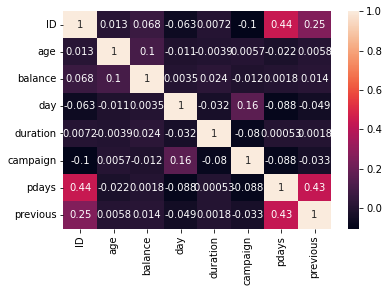

In [18]:
sns.heatmap(train.corr(),annot=True)

# <span style="color:red">Data Visualisation </span>

<AxesSubplot:>

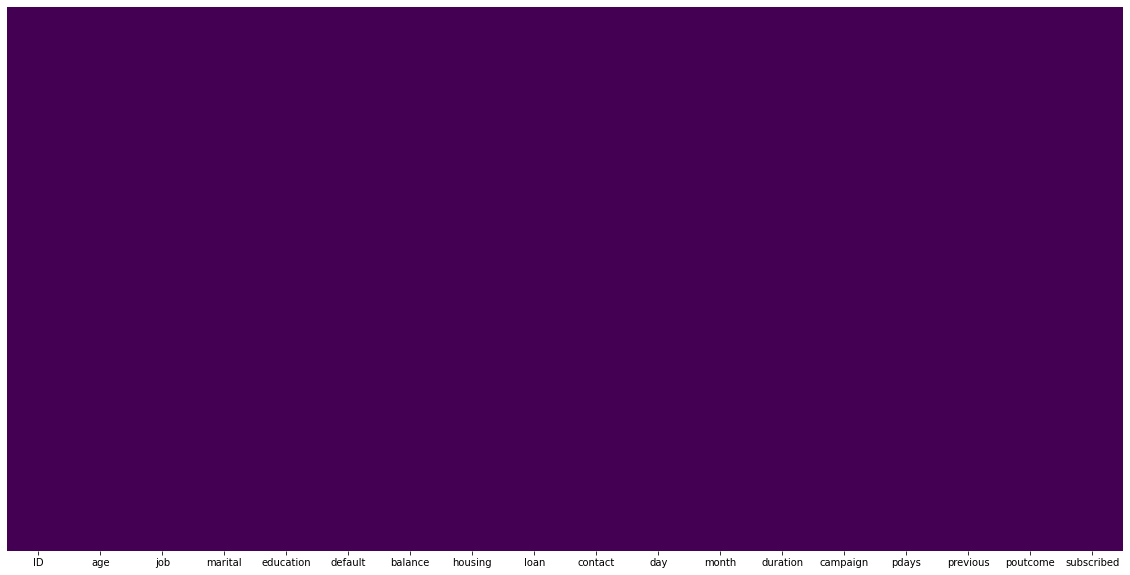

In [19]:

plt.figure(figsize =(20, 10))
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

### <span style="color:green">-> To check skewness of entire dataset all together </span>

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

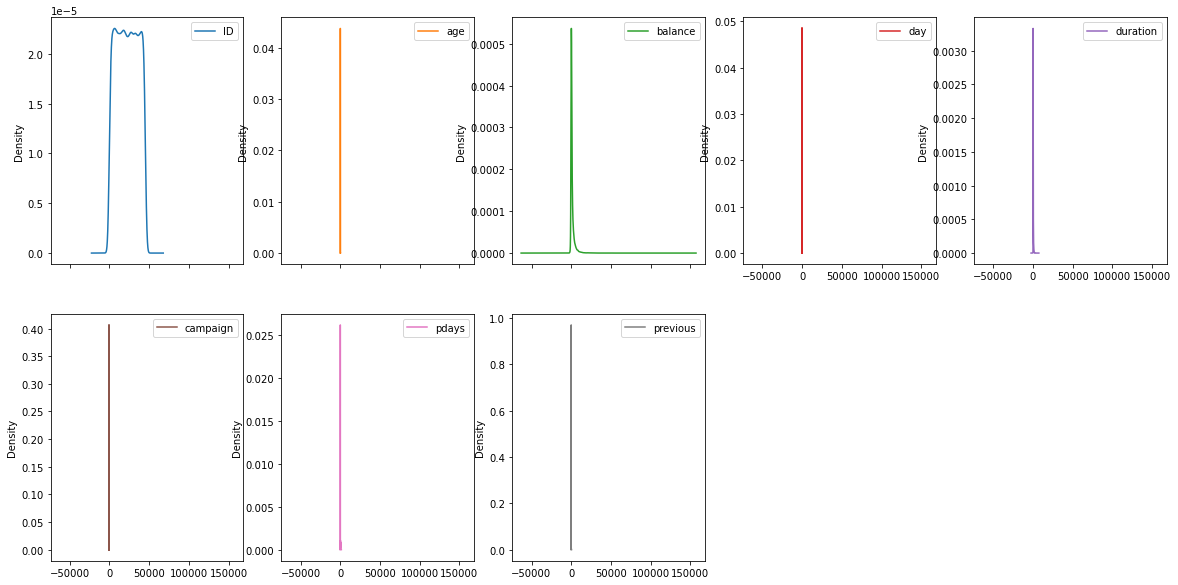

In [20]:
train.plot(kind='kde',subplots=True,layout=(2,5), figsize=(20,10))

### <span style="color:green">-> To Show The Distribution Of All Variables</span>

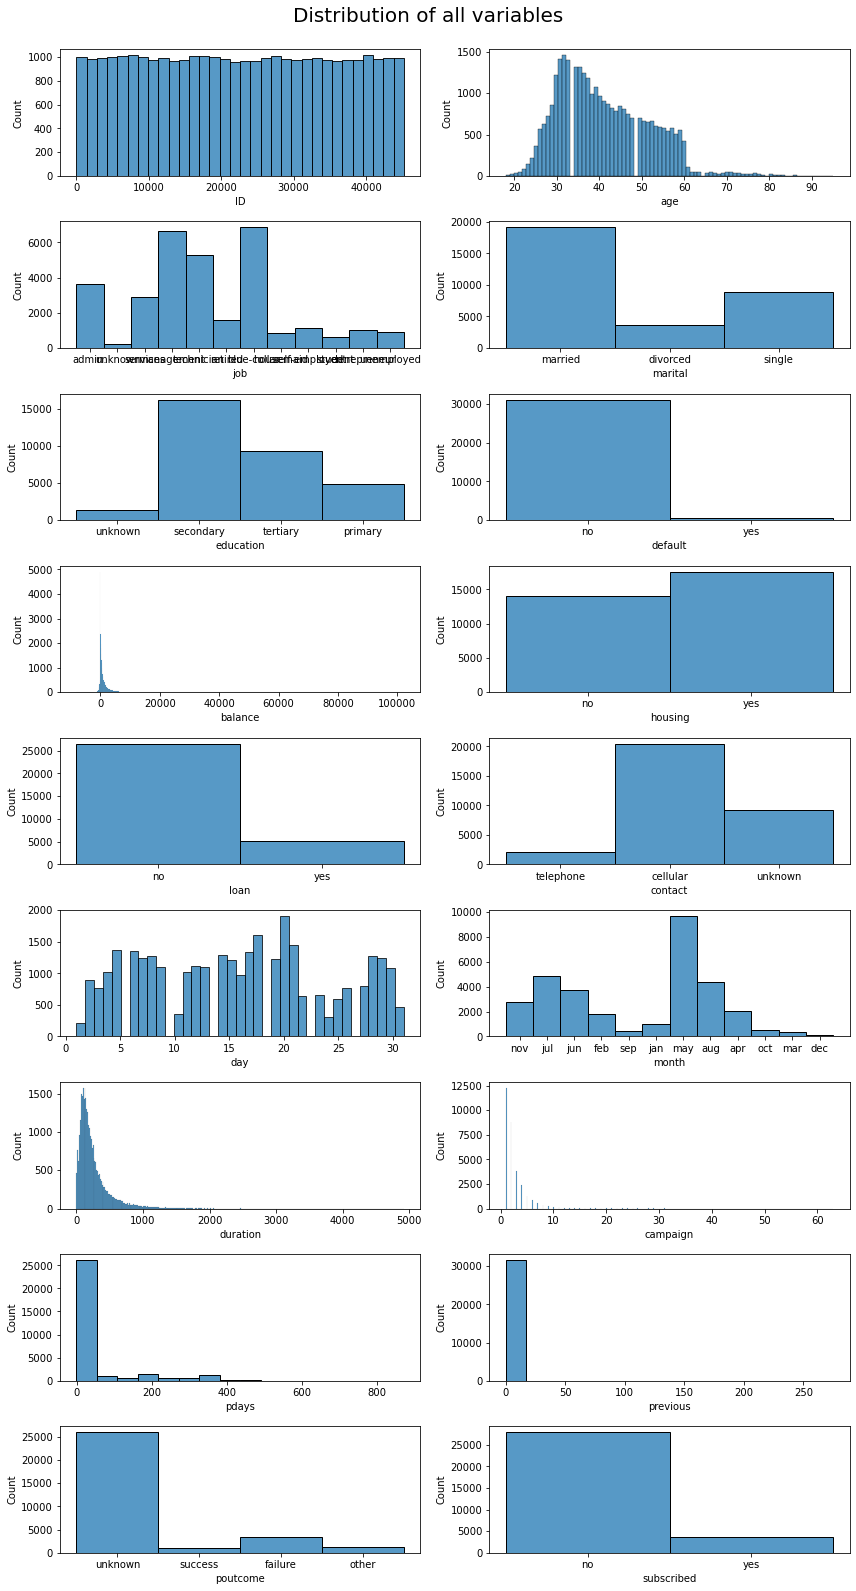

In [21]:
ncols = 2
nrows = np.ceil(len(train.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train.columns, axs.flatten()):
    sns.histplot(train, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

### <span style="color:green">-> Visualization of subscribed column</span>

In [22]:
#Frequency of 'subscribed'
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [23]:
#Normalizing the frequency table of 'Subscribed' variable
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

([<matplotlib.patches.Wedge at 0x23e6b82d9d0>,
 [Text(-1.2125947156006418, 0.4686299773781, 'no'),
  Text(1.026041719557412, -0.3965329617165124, 'yes')])

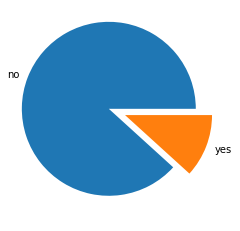

In [24]:
subscribed_count= pd.DataFrame(train['subscribed'].value_counts())
plt.pie(subscribed_count['subscribed'], labels =['no' , 'yes'], explode = (0.2,0))

<AxesSubplot:xlabel='subscribed', ylabel='count'>

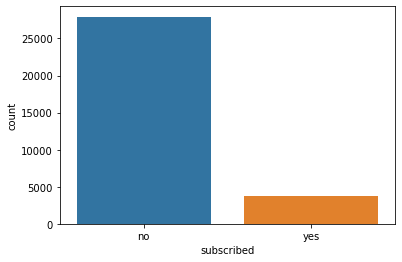

In [25]:
# Plotting the 'subscribed' frequency
sns.countplot(data=train, x='subscribed')

### <span style="color:green">-> Visualization of job​ column</span>

In [26]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

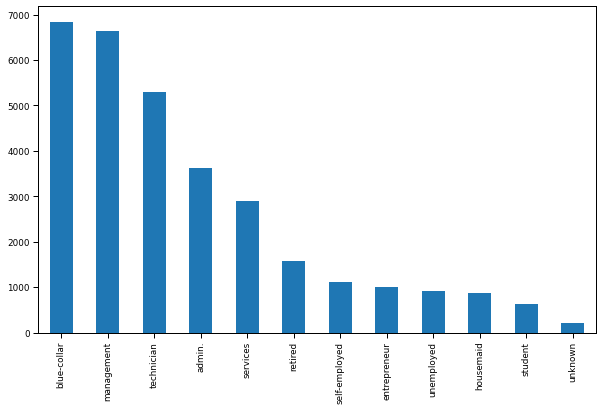

In [27]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

#### <span style="color:blue">Observation:-</span>
__We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.__

### <span style="color:blue">-> People From Different Job Who Subscribed </span>

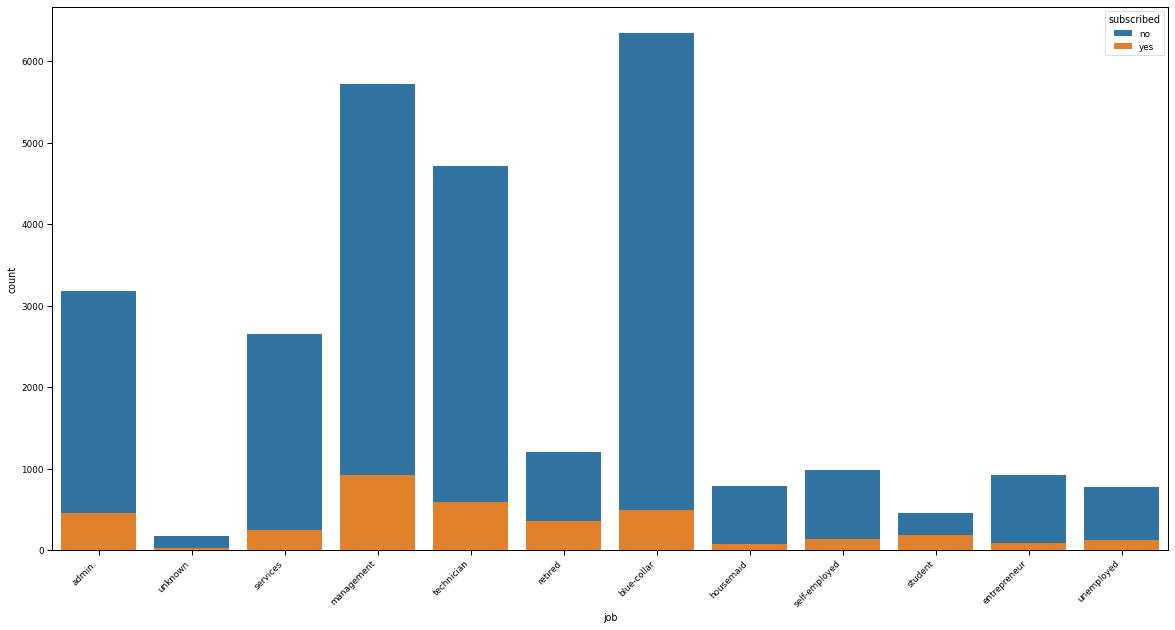

In [28]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'job', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.__

### <span style="color:green">-> Visualization of marital column</span>

In [29]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

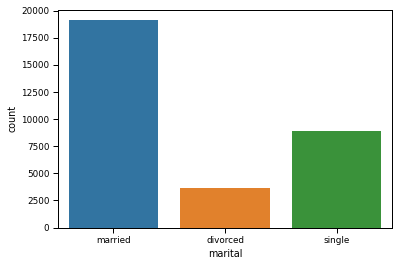

In [30]:
sns.countplot(data=train, x='marital');

### <span style="color:blue">->Subscription Based on Marital Status </span>

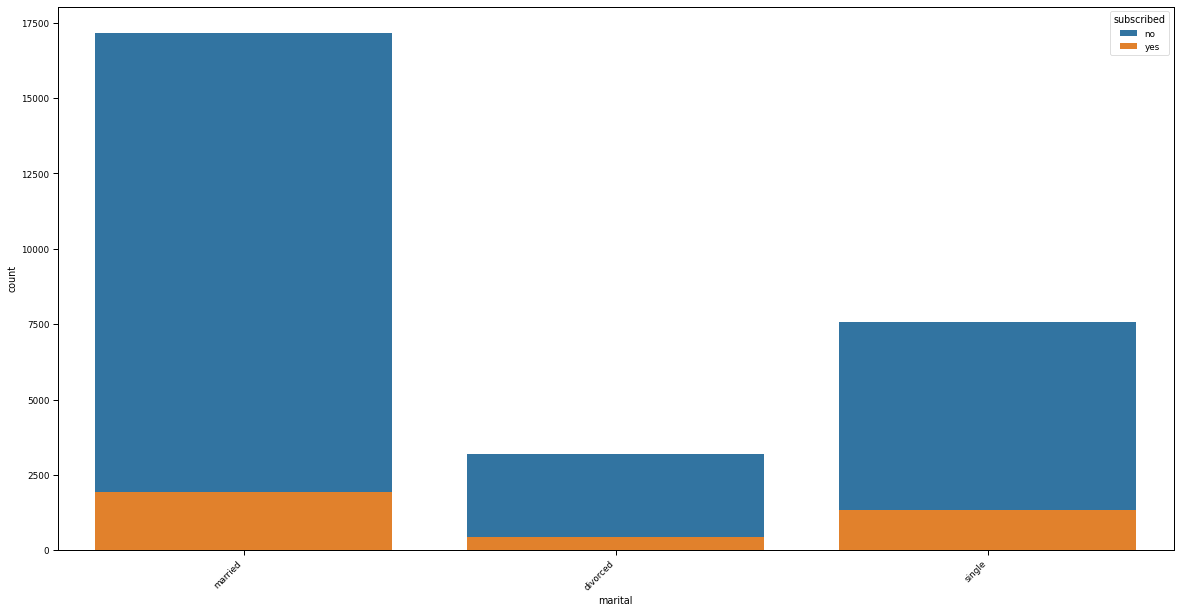

In [31]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'marital', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that marital status doesn't have a major impact on the subscription to term deposits.__

### <span style="color:green">-> Visualization of Age column</span>

In [32]:
train['age'].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

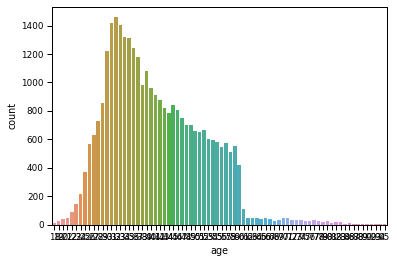

In [33]:
sns.countplot(data=train, x='age');

<AxesSubplot:>

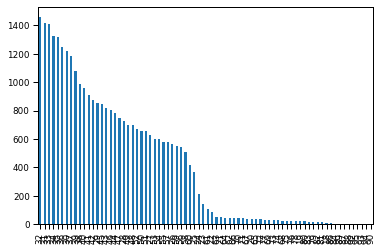

In [34]:
train['age'].value_counts().plot(kind='bar')

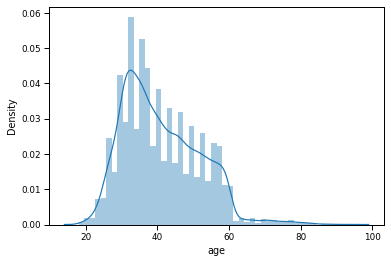

In [35]:
sns.distplot(train['age']);

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that most of the clients fall in the age group between 20-60.__

### <span style="color:blue">->Subscription Based on age </span>

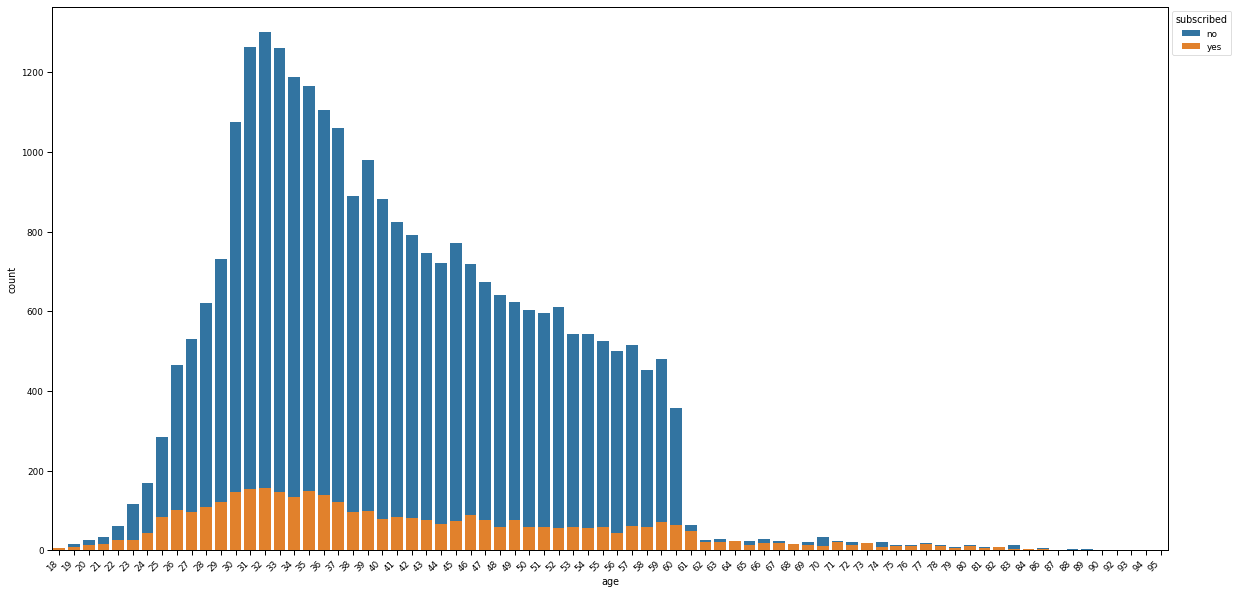

In [36]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'age', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that most of the clients who are subscibing fall in the age group between 20-60.__

### <span style="color:green">-> Visualization of education column</span>

In [37]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<AxesSubplot:>

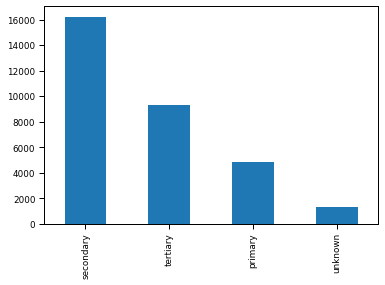

In [38]:
train['education'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on education </span>

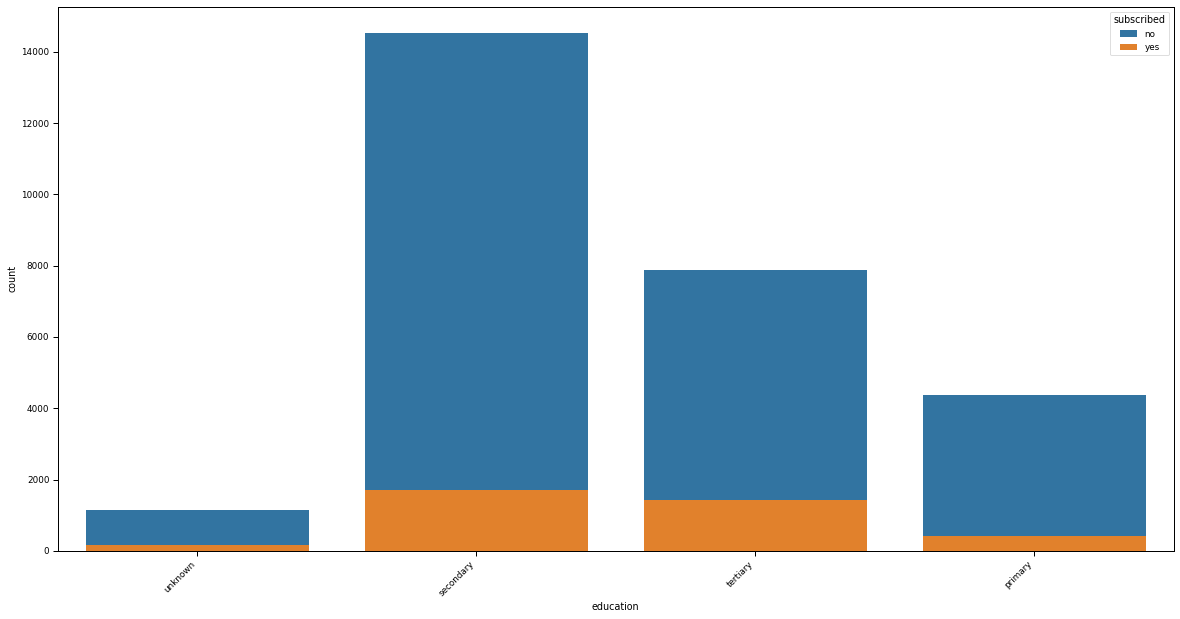

In [39]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'education', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that education status doesn't have a major impact on the subscription to term deposits.__

### <span style="color:green">-> Visualization of default column</span>

In [40]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

<AxesSubplot:>

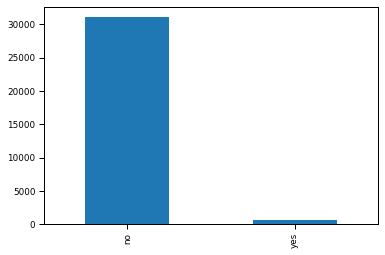

In [41]:
train['default'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on default </span>

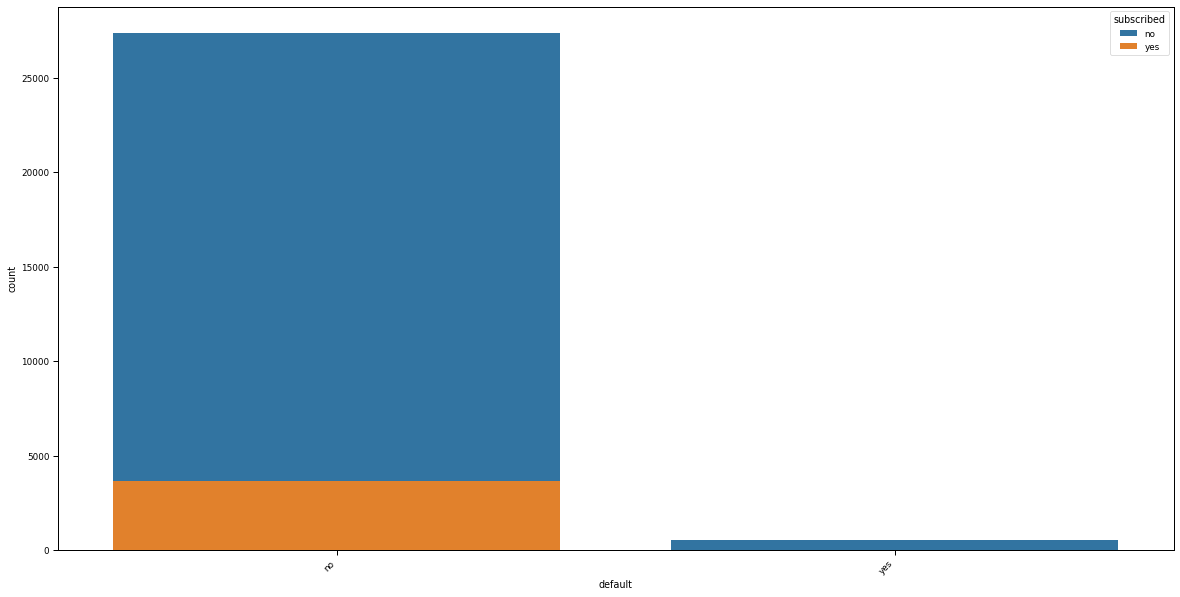

In [42]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'default', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

#### <span style="color:blue">Observation:-</span>

__On the basis of above observation, we can say that if the clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.__

### <span style="color:green">-> Visualization of balance column</span>

In [43]:
train['balance'].value_counts()

 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64

### <span style="color:green">-> Visualization of housing column</span>

In [44]:
train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

<AxesSubplot:>

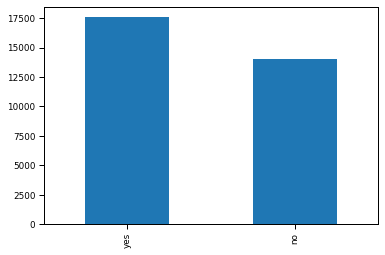

In [45]:
train['housing'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on housing </span>

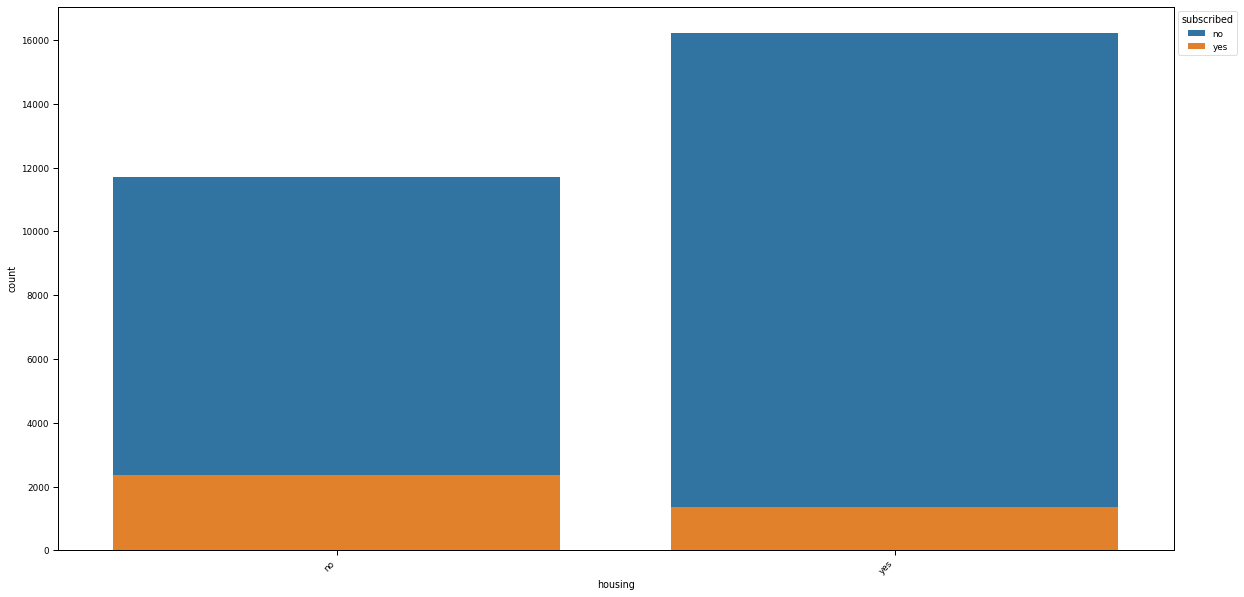

In [46]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'housing', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of loan column</span>

In [47]:
train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

<AxesSubplot:>

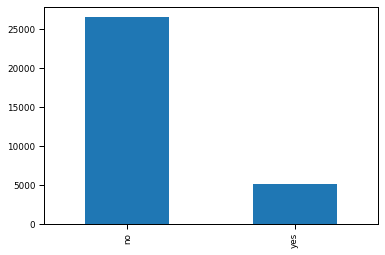

In [48]:
train['loan'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on loan </span>

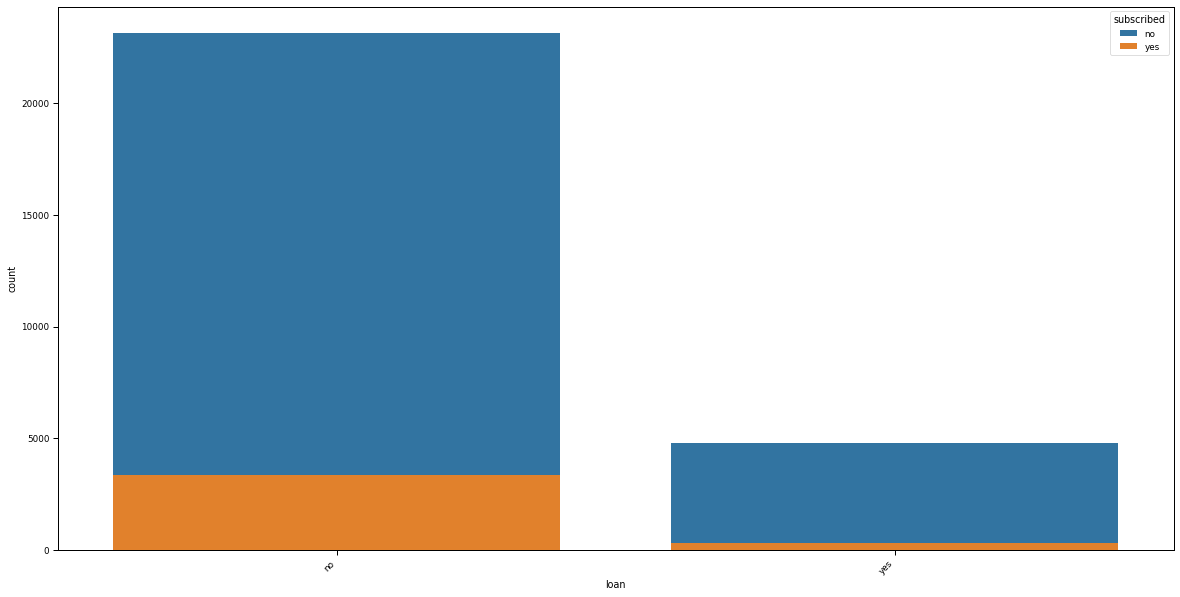

In [49]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'loan', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of contact column</span>

In [50]:
train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

<AxesSubplot:>

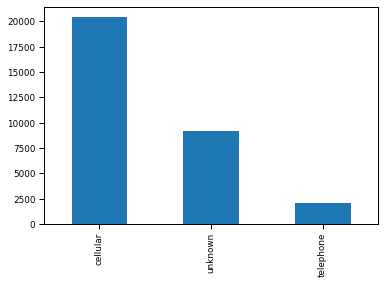

In [51]:
train['contact'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on contact </span>

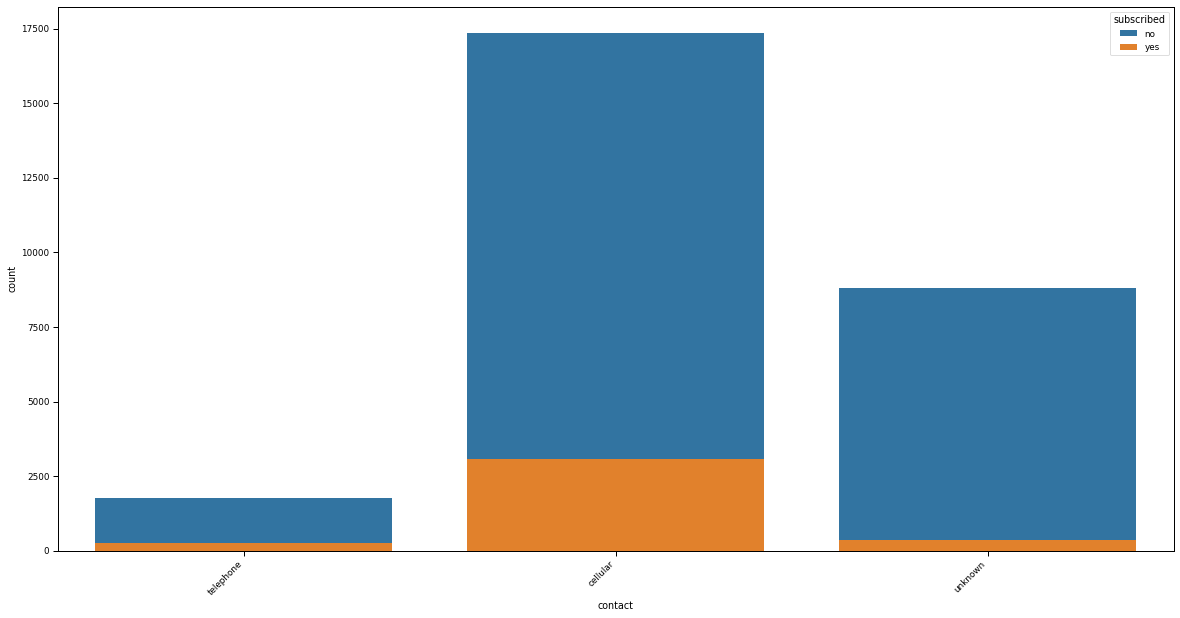

In [52]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'contact', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of day column</span>

In [53]:
train['day'].value_counts()

20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: day, dtype: int64

<AxesSubplot:>

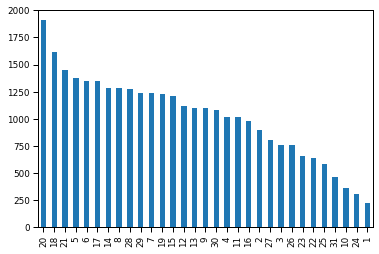

In [54]:
train['day'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on day </span>

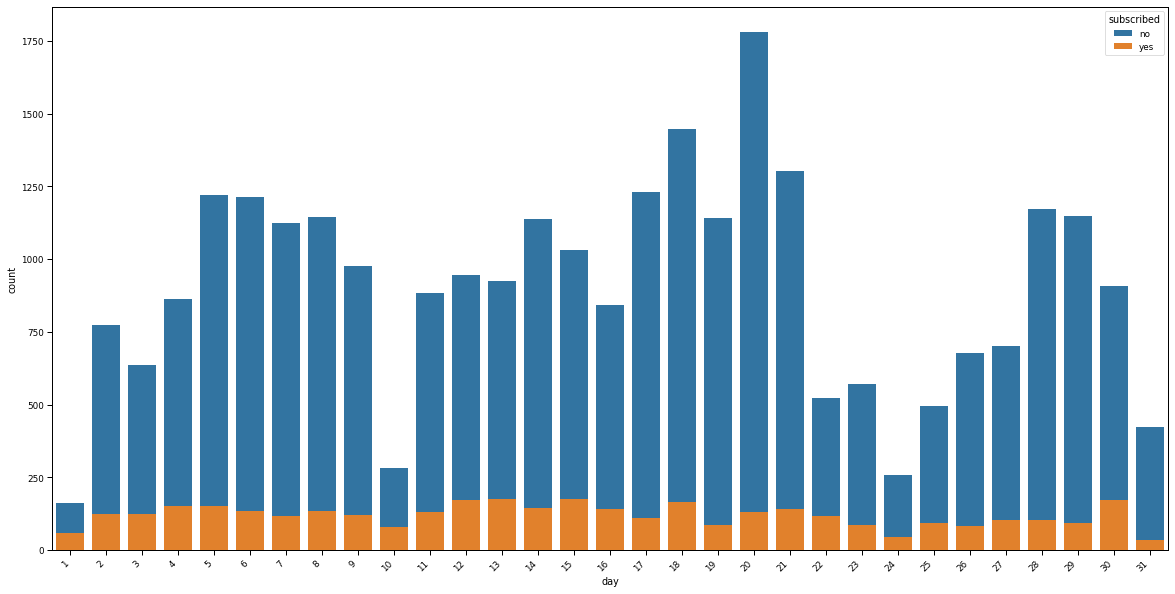

In [55]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'day', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of month column</span>

In [56]:
train['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

<AxesSubplot:>

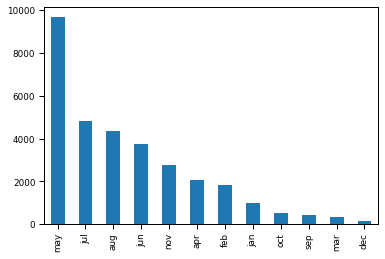

In [57]:
train['month'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on month </span>

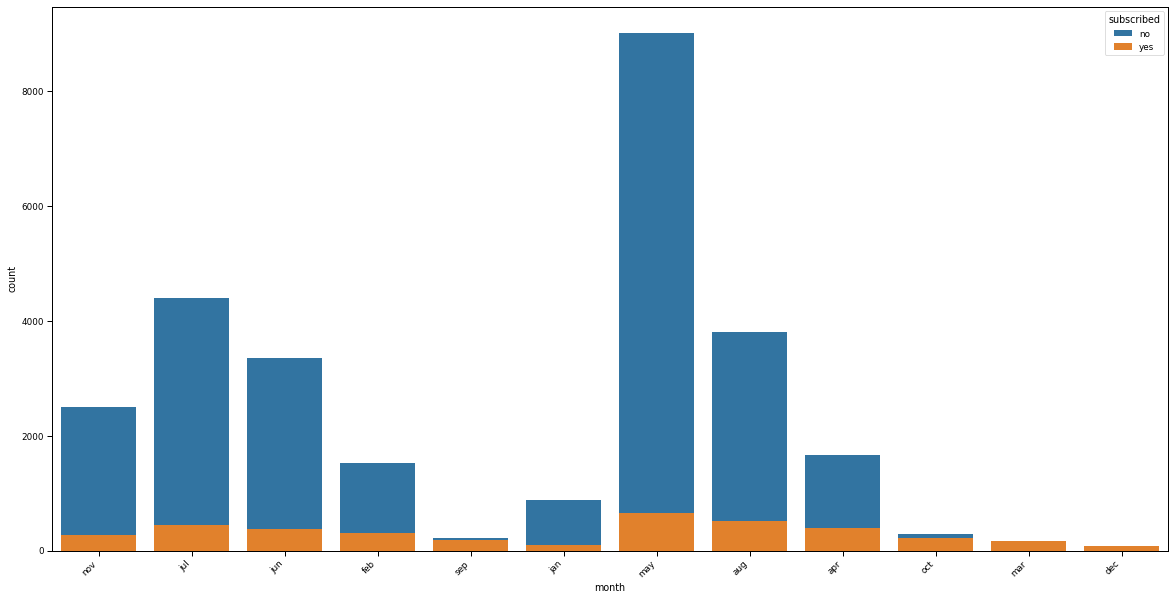

In [58]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'month', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of duration column</span>

In [59]:
train['duration'].value_counts()

90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: duration, Length: 1454, dtype: int64

<AxesSubplot:>

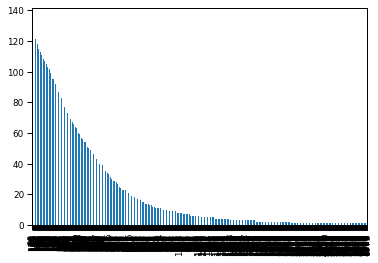

In [60]:
train['duration'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on duration </span>

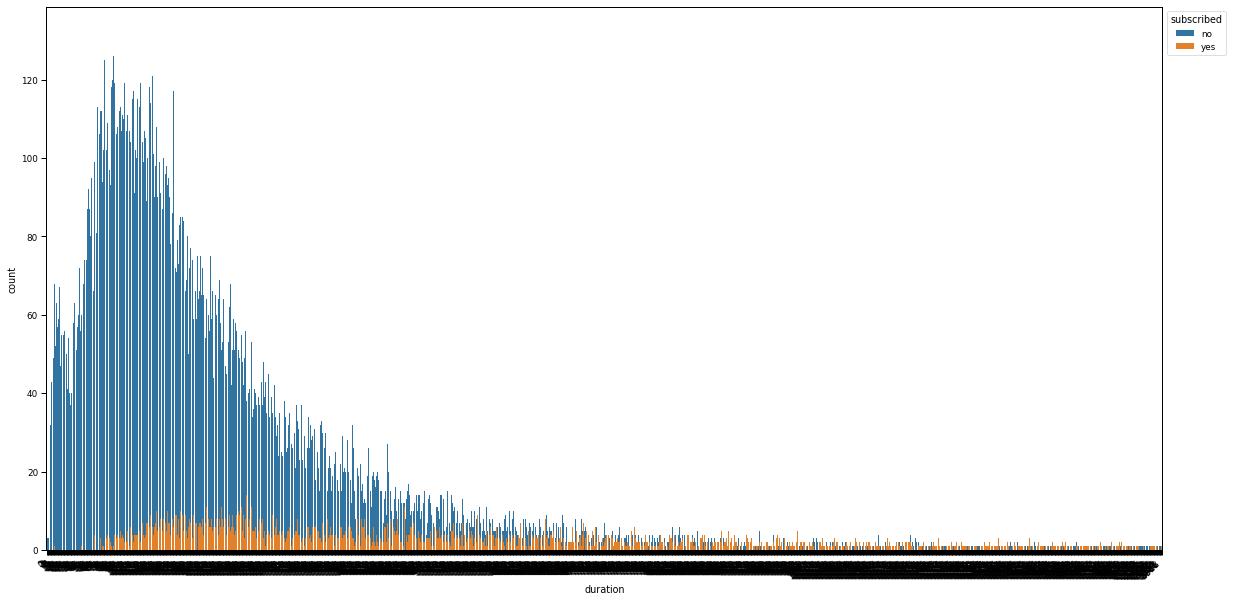

In [61]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'duration', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of campaign column</span>

In [62]:
train['campaign'].value_counts()

1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: campaign, dtype: int64

<AxesSubplot:>

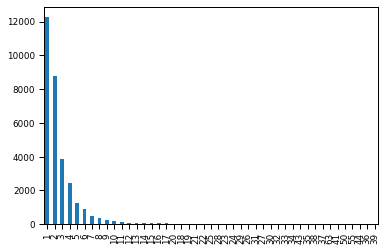

In [63]:
train['campaign'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on campaign </span>

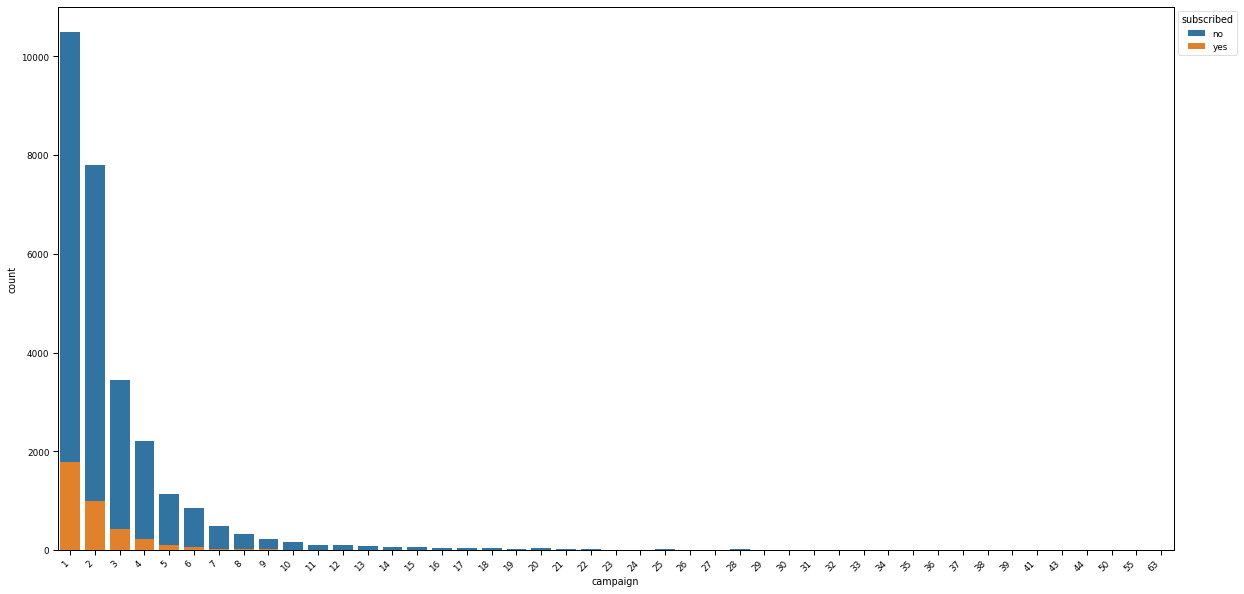

In [64]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'campaign', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

### <span style="color:green">-> Visualization of pdays column</span>

In [65]:
train['pdays'].value_counts()

-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: pdays, Length: 509, dtype: int64

<AxesSubplot:>

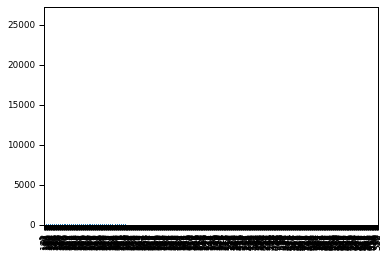

In [66]:
train['pdays'].value_counts().plot(kind='bar')

### <span style="color:blue">->Subscription Based on pdays </span>

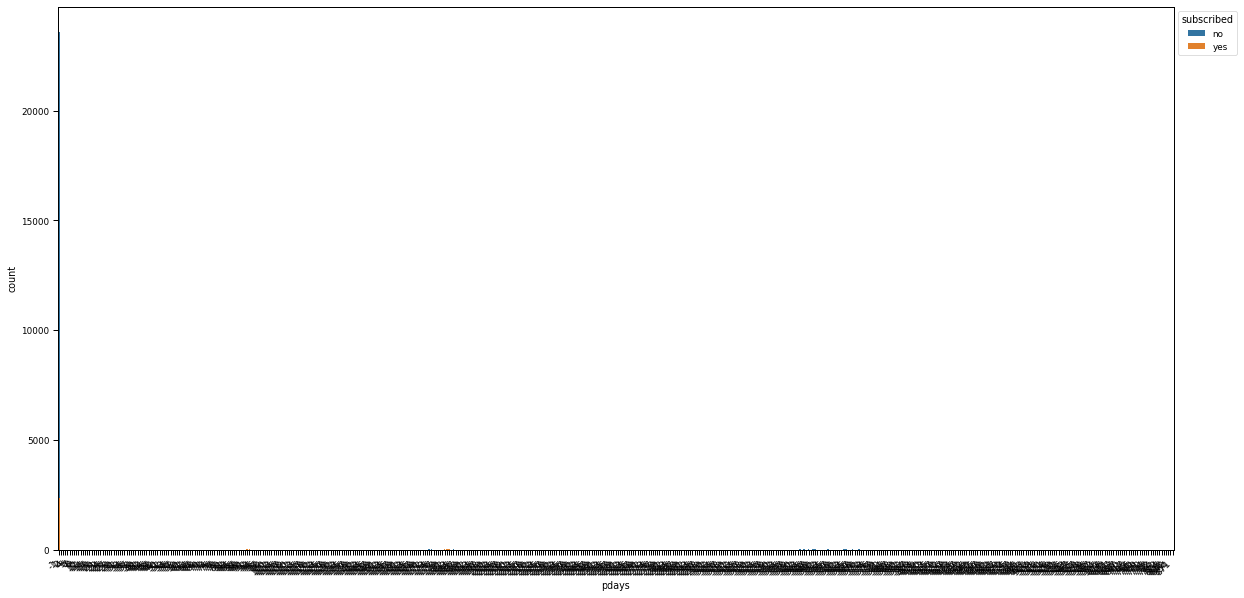

In [67]:
plt.figure(figsize =(20, 10))
sns.countplot(x = 'pdays', hue = 'subscribed', data = train, dodge = False) 
plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'subscribed', bbox_to_anchor = (1, 1))

## <span style="color:red">Level Encoding</span>

### <span style="color:green">To Encode Categorical Values of subscribed Column</span>

In [68]:
print(train['subscribed'].value_counts())

no     27932
yes     3715
Name: subscribed, dtype: int64


In [69]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

### <span style="color:green">To Encode Categorical Values of poutcome Column</span>

In [70]:
print(train['poutcome'].value_counts())

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


In [71]:
train['poutcome'].replace('unknown', 0,inplace=True)
train['poutcome'].replace('failure', 1,inplace=True)
train['poutcome'].replace('other', 2,inplace=True)
train['poutcome'].replace('success', 3,inplace=True)

### <span style="color:green">To Encode Categorical Values of month Column</span>

In [72]:
print(train['month'].value_counts())

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


In [73]:
train['month'].replace('jan', 1,inplace=True)
train['month'].replace('feb', 2,inplace=True)
train['month'].replace('mar', 3,inplace=True)
train['month'].replace('apr', 4,inplace=True)
train['month'].replace('may', 5,inplace=True)
train['month'].replace('jun', 6,inplace=True)
train['month'].replace('jul', 7,inplace=True)
train['month'].replace('aug', 8,inplace=True)
train['month'].replace('sep', 9,inplace=True)
train['month'].replace('oct', 10,inplace=True)
train['month'].replace('nov', 11,inplace=True)
train['month'].replace('dec', 12,inplace=True)

### <span style="color:green">To Encode Categorical Values of contact Column</span>

In [74]:
print(train['contact'].value_counts())

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


In [75]:
train['contact'].replace('cellular', 0,inplace=True)
train['contact'].replace('unknown', 1,inplace=True)
train['contact'].replace('telephone', 2,inplace=True)

### <span style="color:green">To Encode Categorical Values of education Column</span>

In [76]:
print(train['education'].value_counts())

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


In [77]:
train['education'].replace('unknown', 0,inplace=True)
train['education'].replace('primary', 1,inplace=True)
train['education'].replace('secondary', 2,inplace=True)
train['education'].replace('tertiary', 3,inplace=True)

### <span style="color:green">To Encode Categorical Values of marital Column</span>

In [78]:
print(train['marital'].value_counts())

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


In [79]:
train['marital'].replace('divorced', 0,inplace=True)
train['marital'].replace('single', 1,inplace=True)
train['marital'].replace('married', 2,inplace=True)

### <span style="color:green">To Encode Categorical Values of job Column</span>

In [80]:
print(train['job'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


In [81]:
train['job'].replace('unknown', 0,inplace=True)
train['job'].replace('student', 1,inplace=True)
train['job'].replace('housemaid', 2,inplace=True)
train['job'].replace('unemployed', 3,inplace=True)
train['job'].replace('entrepreneur', 4,inplace=True)
train['job'].replace('self-employed', 5,inplace=True)
train['job'].replace('retired', 6,inplace=True)
train['job'].replace('services', 7,inplace=True)
train['job'].replace('admin.', 8,inplace=True)
train['job'].replace('technician', 9,inplace=True)
train['job'].replace('management', 10,inplace=True)
train['job'].replace('blue-collar', 11,inplace=True)

### <span style="color:green">To Encode Categorical Values of housing Column</span>

In [82]:
print(train['housing'].value_counts())

yes    17584
no     14063
Name: housing, dtype: int64


In [83]:
train['housing'].replace('no', 0,inplace=True)
train['housing'].replace('yes', 1,inplace=True)

### <span style="color:green">To Encode Categorical Values of loan Column</span>

In [84]:
print(train['loan'].value_counts())

no     26516
yes     5131
Name: loan, dtype: int64


In [85]:
train['loan'].replace('no', 0,inplace=True)
train['loan'].replace('yes', 1,inplace=True)

### <span style="color:green">To Encode Categorical Values of default Column</span>

In [86]:
print(train['default'].value_counts())

no     31062
yes      585
Name: default, dtype: int64


In [87]:
train['default'].replace('no', 0,inplace=True)
train['default'].replace('yes', 1,inplace=True)

In [88]:
print(train)

          ID  age  job  marital  education  default  balance  housing  loan  \
0      26110   56    8        2          0        0     1933        0     0   
1      40576   31    0        2          2        0        3        0     0   
2      15320   27    7        2          2        0      891        1     0   
3      43962   57   10        0          3        0     3287        0     0   
4      29842   31    9        2          2        0      119        1     0   
...      ...  ...  ...      ...        ...      ...      ...      ...   ...   
31642  36483   29   10        1          3        0        0        1     0   
31643  40178   53   10        0          3        0      380        0     1   
31644  19710   32   10        1          3        0      312        0     0   
31645  38556   57    9        2          2        0      225        1     0   
31646  14156   55   10        0          2        0      204        1     0   

       contact  day  month  duration  campaign  pda

## <span style="color:red">Correlation matrix</span>

In [89]:
tc = train.corr()
tc

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,-0.094130,-0.045255,0.097732,-0.051521,0.067897,-0.180047,-0.086140,-0.454598,-0.063399,0.025000,0.007183,-0.103508,0.436148,0.254476,0.469339,0.296663
age,0.013337,1.000000,-0.082092,0.122745,-0.171256,-0.016117,0.103245,-0.183775,-0.012657,0.122586,-0.011056,0.098714,-0.003870,0.005733,-0.021947,0.005761,0.011024,0.024538
job,-0.094130,-0.082092,1.000000,0.043459,0.065953,-0.001331,-0.024099,0.174722,0.038604,-0.010524,0.011820,-0.013037,-0.001173,0.024157,0.014146,0.001548,-0.026238,-0.058346
marital,-0.045255,0.122745,0.043459,1.000000,-0.093412,-0.018933,0.021839,0.010397,0.022987,0.042071,0.002926,0.045301,-0.020817,0.038075,-0.024358,-0.008688,-0.025346,-0.048413
education,0.097732,-0.171256,0.065953,-0.093412,1.000000,-0.006158,0.049810,-0.043637,0.005124,-0.156970,0.015480,0.068743,0.006229,-0.002680,0.008530,0.021939,0.043159,0.052489
default,-0.051521,-0.016117,-0.001331,-0.018933,-0.006158,1.000000,-0.069422,-0.011823,0.081567,0.000647,0.009996,0.014244,-0.010849,0.018538,-0.029622,-0.015877,-0.037558,-0.020168
balance,0.067897,0.103245,-0.024099,0.021839,0.049810,-0.069422,1.000000,-0.067466,-0.083631,0.002861,0.003461,0.095850,0.024274,-0.012032,0.001789,0.013843,0.032306,0.050807
housing,-0.180047,-0.183775,0.174722,0.010397,-0.043637,-0.011823,-0.067466,1.000000,0.036244,0.092088,-0.025666,-0.173980,0.003021,-0.021076,0.118790,0.034231,-0.007233,-0.141092
loan,-0.086140,-0.012657,0.038604,0.022987,0.005124,0.081567,-0.083631,0.036244,1.000000,-0.016238,0.014769,0.022717,-0.012781,0.009340,-0.020078,-0.009258,-0.045987,-0.072266
contact,-0.454598,0.122586,-0.010524,0.042071,-0.156970,0.000647,0.002861,0.092088,-0.016238,1.000000,-0.007594,-0.105525,-0.028858,0.050563,-0.171262,-0.090064,-0.170050,-0.103834


<AxesSubplot:>

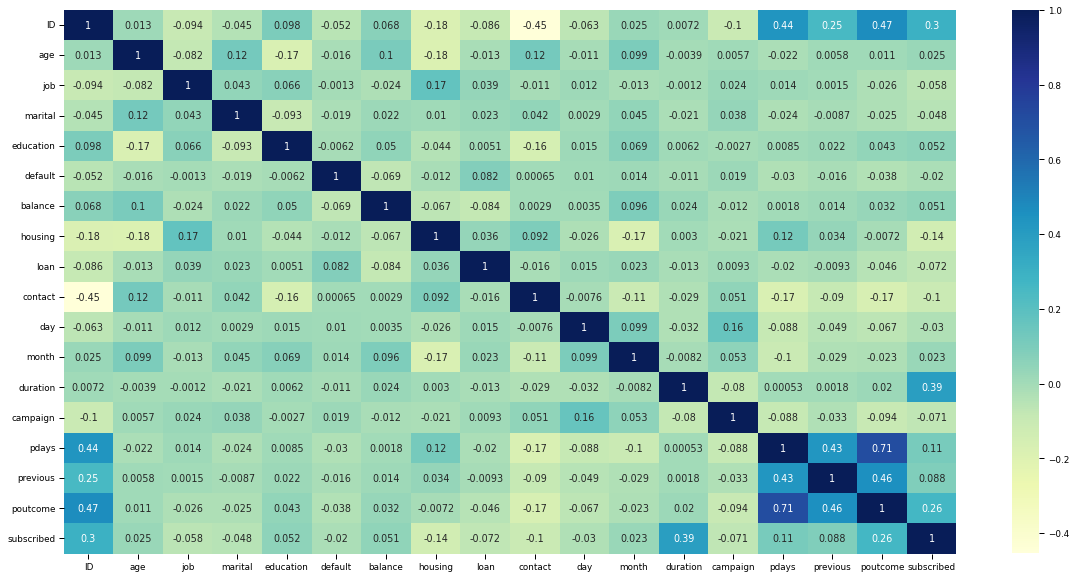

In [90]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(tc, annot=True, cmap='YlGnBu')

#### <span style="color:blue">Observation:-</span>
__On the basis of above observation, we can say that duration of the call is highly correlated with the target variable. As the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and hence there are higher chances that the client will subscribe to term deposit.__

## <span style="color:red">Model Building</span>

In [91]:
# independent column

X = train.drop('subscribed', axis=1)

# target
y = train['subscribed'] #predictor variable


In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.30, random_state= 11)

In [93]:
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (22152, 17)
Y Train Shape  (22152,)
X Test Shape  (9495, 17)
Y Test Shape  (9495,)


#  <span style="color:red">Model Building</span>

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

In [95]:
#Logistic Regression
lr=LogisticRegression() 

#KNearest Neibour
knn=KNeighborsClassifier()

# Deciesion Tree
dt=DecisionTreeClassifier() 

# Random Forest
rf=RandomForestClassifier() 

# Adaboost Classifier 
adb=AdaBoostClassifier()   

# support vactor classifier
svm=SVC()   

#Gradient Boosting Classifier 
gdboost=GradientBoostingClassifier() 

#Xtrim Gredient Boosting Classifier 
xgboost=XGBClassifier()  

print("Model is created")

Model is created


## <span style="color:green">Applying All 8 Models</span>

In [96]:
# Applying Logistic Regression
lr.fit(X_train, y_train)

# Applying KNearest Neibour
knn.fit(X_train,y_train)

# Applying Deciesion Tree
dt.fit(X_train,y_train)

# Applying Random Forest
rf.fit(X_train,y_train)

# Applying Adaboost Classifier
adb.fit(X_train,y_train)

# Applying support vactor classifier
svm.fit(X_train,y_train)

# Applying Gradient Boosting Classifier
gdboost.fit(X_train,y_train)

# Applying Xtrim Gredient Boosting Classifier
xgboost.fit(X_train,y_train)
print("Model is trained and ready to work")

Model is trained and ready to work


In [97]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [98]:
# For Logistic Regression
print("Lr classification score",lr.score(X_train,y_train))

# For KNearest Neibour
print("knn classification score",knn.score(X_train,y_train))

# For Deciesion Tree
print("dt classification score",dt.score(X_train,y_train))

# For Random Forest
print("rf classification score",rf.score(X_train,y_train))

# For Adaboost Classifier
print("adb classification score",adb.score(X_train,y_train))

# For support vactor classifier
print("svm classification score",svm.score(X_train,y_train))

# For Gradient Boosting Classifier
print("gdboost classification score",gdboost.score(X_train,y_train))

# For Xtrim Gredient Boosting Classifier
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.8865113759479957
knn classification score 0.9247472011556519
dt classification score 1.0
rf classification score 1.0
adb classification score 0.9062838569880823
svm classification score 0.8833062477428675
gdboost classification score 0.9214066449981942
xgboost classification score 0.9750361141206212


## <span style="color:green">Using Confusion Matrix For Model Evaluation</span>

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [100]:
lr_yprad = lr.predict(X_test)
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("Confusion Matrix for lr_model",'\n',lr_conf_mat)

Confusion Matrix for lr_model 
 [[8108  257]
 [ 848  282]]


In [101]:
knn_yprad = knn.predict(X_test)
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("Confusion Matrix for knn_model",'\n',knn_conf_mat)

Confusion Matrix for knn_model 
 [[8020  345]
 [ 670  460]]


In [102]:
dt_yprad = dt.predict(X_test)
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("Confusion Matrix for dt_model",'\n',dt_conf_mat)

Confusion Matrix for dt_model 
 [[7795  570]
 [ 511  619]]


In [103]:
rf_yprad = rf.predict(X_test)
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("Confusion Matrix for lr_model",'\n',rf_conf_mat)

Confusion Matrix for lr_model 
 [[8070  295]
 [ 558  572]]


In [104]:
adb_yprad = adb.predict(X_test)
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("Confusion Matrix for lr_model",'\n',adb_conf_mat)

Confusion Matrix for lr_model 
 [[8121  244]
 [ 706  424]]


In [105]:
svm_yprad = svm.predict(X_test)
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("Confusion Matrix for svm_model",'\n',svm_conf_mat)

Confusion Matrix for svm_model 
 [[8365    0]
 [1130    0]]


In [106]:
gdboost_yprad = gdboost.predict(X_test)
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("Confusion Matrix for gdboost_model",'\n',gdboost_conf_mat)

Confusion Matrix for gdboost_model 
 [[8047  318]
 [ 542  588]]


In [107]:
xgboost_yprad = xgboost.predict(X_test)
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("Confusion Matrix for xgboost_model",'\n',xgboost_conf_mat)

Confusion Matrix for xgboost_model 
 [[8000  365]
 [ 509  621]]


## <span style="color:green">Checking Classification Report Of All Model</span>

In [108]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      8365
           1       0.52      0.25      0.34      1130

    accuracy                           0.88      9495
   macro avg       0.71      0.61      0.64      9495
weighted avg       0.86      0.88      0.87      9495

 knn classification_report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      8365
           1       0.57      0.41      0.48      1130

    accuracy                           0.89      9495
   macro avg       0.75      0.68      0.71      9495
weighted avg       0.88      0.89      0.89      9495

 dt classification_report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      8365
           1       0.52      0.55      0.53      1130

    accuracy                           0.89      9495
   macro avg       0.73      0.74      0.73

## <span style="color:blue">-> Using AUC - ROC Curve</span>

In [109]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [110]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.60941713524007
0.6829181852324
0.7398232733312528
0.7354643505123011
0.6730260408677116
0.5
0.7411692206782369
0.7529616660230946


### <span style="color:green">-> Using ROC curve to check best fittted model</span>

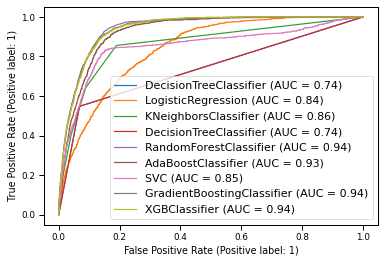

In [111]:
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

#### <span style="color:blue">Observation:-</span>

- As we can see our rf, adb, xgboost & gdboost classifier are giving the best scores.

## <span style="color:blue">-> K-Fold Cross Validation</span>

In [112]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [113]:
print("Mean of Cross validation score for rf  model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Mean of Cross validation score for xgboost  model","=>",cross_val_score(xgboost,X,y,cv=5).mean())
print("Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.9110184643671138
Cross validation score for adb model => 0.9039087307678964
Mean of Cross validation score for xgboost  model => 0.9114290720740081
Cross validation score for gdboost model => 0.9112711540972034


#### <span style="color:blue">Observation:-</span>


- As per above we can see our ‘rf’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increase.

# <span style="color:red">MODEL SAVING:---------</span>

In [114]:
import pickle
Census_model = 'Banking_model.pickle'
pickle.dump(rf,open(Census_model,'wb'))

In [115]:
Model = pickle.load(open('Banking_model.pickle','rb'))
result = Model.score(X_test, y_test)
print(result)

0.9101632438125329


In [116]:
Prediction=np.array(rf.predict(X_test))

In [117]:
Banking_Marketing  =pd.DataFrame([Model.predict(X_test)[:],Prediction[:]],index=['Predicted','Original'])

In [118]:
Banking_Marketing

,0,1,2,3,4,5,6,7,8,9,...,9485,9486,9487,9488,9489,9490,9491,9492,9493,9494
Predicted,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Original,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
Banking_Marketing.to_csv('Banking_Marketing file.csv', header=True, index=False)